<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


#### Read the dataset in the csv file from the URL


In [15]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [16]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

In [17]:
# Code to understand the structure and content of the DataFrame:

# 1. Display the first few rows
print("First 5 rows:")
print(boston_df.head())

First 5 rows:
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


In [18]:
# 2. Display the last few rows
print("\nLast 5 rows:")
print(boston_df.tail())


Last 5 rows:
     Unnamed: 0     CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
501         501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
501  273.0     21.0   9.67  22.4  
502  273.0     21.0   9.08  20.6  
503  273.0     21.0   5.64  23.9  
504  273.0     21.0   6.48  22.0  
505  273.0     21.0   7.88  11.9  


In [19]:
# 3. Get a concise summary of the DataFrame (column names, non-null counts, data types)
print("\nDataFrame info:")
print(boston_df.info())


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB
None


In [21]:
# 5. Count of missing values in each column
print("\nMissing values per column:")
print(boston_df.isnull().sum())


Missing values per column:
Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64


In [30]:
# Basic statistics
basic_stats = boston_df.describe()

# Visualizations
plt.figure(figsize=(15, 10))

# Print basic statistics
print(basic_stats)

       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Median Home Values (MEDV)')

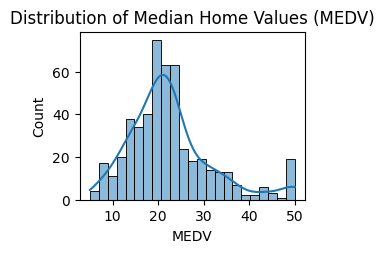

In [23]:
# Histogram for MEDV
plt.subplot(2, 2, 1)
sns.histplot(boston_df['MEDV'], kde=True)
plt.title('Distribution of Median Home Values (MEDV)')

Text(0.5, 1.0, 'Nitric Oxide Concentrations vs Non-Retail Business Acres')

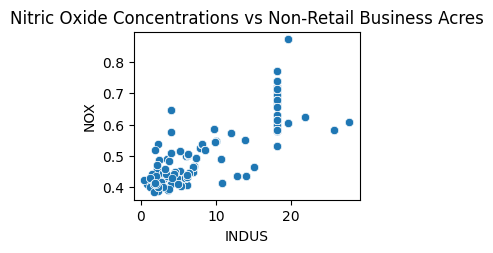

In [26]:
# Scatter plot for NOX vs INDUS
plt.subplot(2, 2, 3)
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Nitric Oxide Concentrations vs Non-Retail Business Acres')

Text(0.5, 1.0, 'Median Home Values by Charles River Bound (CHAS)')

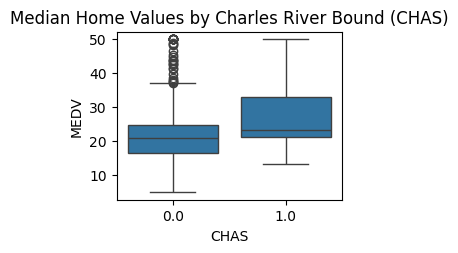

In [24]:
# Boxplot for CHAS vs MEDV
plt.subplot(2, 2, 2)
sns.boxplot(x='CHAS', y='MEDV', data=boston_df)
plt.title('Median Home Values by Charles River Bound (CHAS)')

In [32]:
# Is there a significant difference in the median value of houses bounded by the Charles River?
# Test: Two-sample t-test (or Mann-Whitney U test if the data is not normally distributed).

from scipy.stats import ttest_ind, mannwhitneyu

# Separate the data into two groups based on CHAS
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(chas_1, chas_0, equal_var=False)

# Alternatively, use Mann-Whitney U test if the data is not normally distributed
# u_stat, p_value = mannwhitneyu(chas_1, chas_0)

print(f"T-test p-value: {p_value}")

T-test p-value: 0.003567170098137517


Text(0.5, 1.0, 'Weighted Distance to Employment Centers vs Median Home Values')

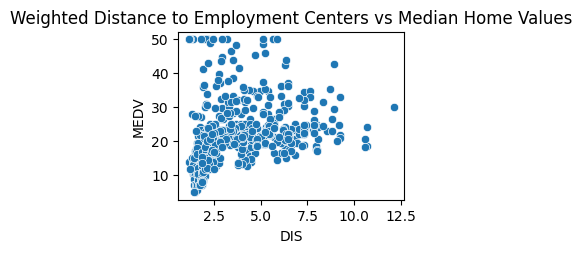

In [27]:
# Scatter plot for DIS vs MEDV
plt.subplot(2, 2, 4)
sns.scatterplot(x='DIS', y='MEDV', data=boston_df)
plt.title('Weighted Distance to Employment Centers vs Median Home Values')

# Task 2: Generate Descriptive Statistics and Visualizations

In [39]:
plt.tight_layout()
plt.savefig('basic_visualizations.png', format='png', dpi=200)
plt.show()

<Figure size 640x480 with 0 Axes>

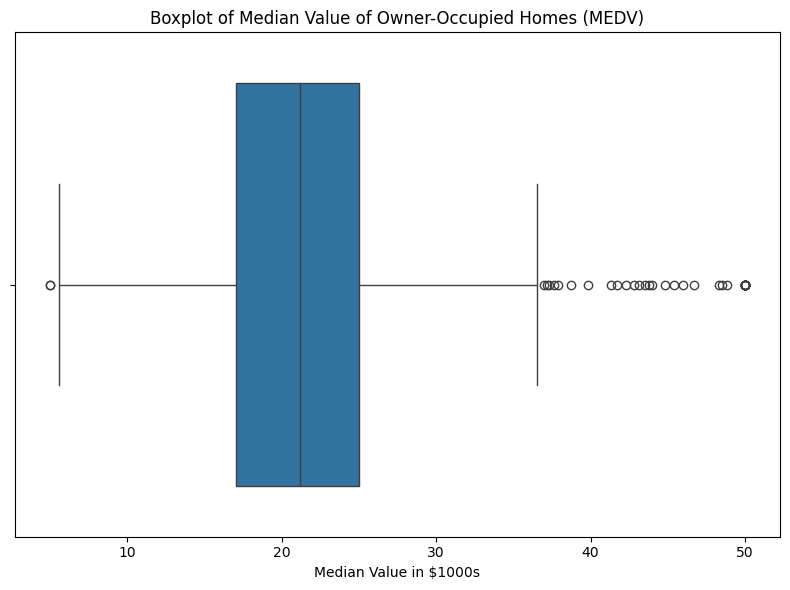

In [41]:
# Create a boxplot for MEDV
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=boston_df['MEDV'])  # Create the boxplot

# Add title and labels
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value in $1000s')

plt.tight_layout()
plt.savefig('basic_visualizations.png', format='png', dpi=200)
plt.show()

# # Show the plot
# plt.grid(True)  # Add grid lines for better readability
# plt.show()      # Display the plot

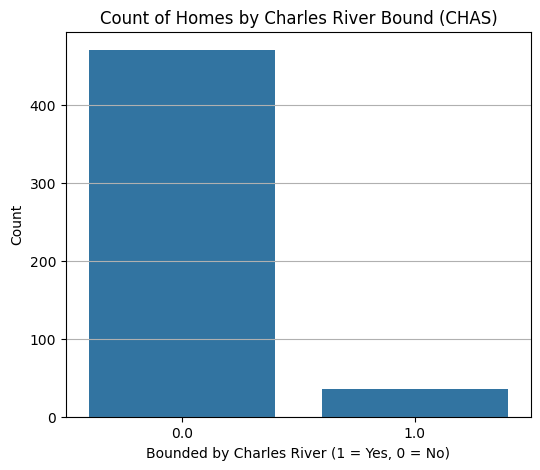

In [43]:
# Create a bar plot for CHAS
plt.figure(figsize=(6, 5))  # Set the figure size
sns.countplot(x='CHAS', data=boston_df)  # Create the bar plot

# Add title and labels
plt.title('Count of Homes by Charles River Bound (CHAS)')
plt.xlabel('Bounded by Charles River (1 = Yes, 0 = No)')
plt.ylabel('Count')

# Show the plot
plt.grid(True, axis='y')  # Add grid lines for better readability
plt.show()  # Display the plot

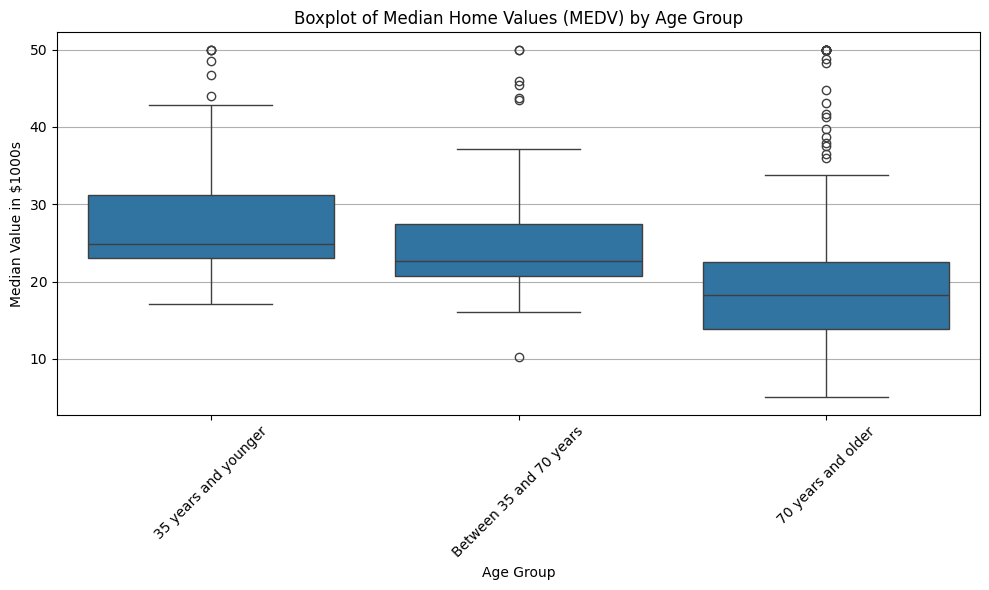

In [46]:
# Discretize the AGE variable into three groups
bins = [0, 35, 70, 100]  # Define the bin edges
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Create a boxplot for MEDV vs. AGE_GROUP
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)  # Create the boxplot

# Add title and labels
plt.title('Boxplot of Median Home Values (MEDV) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value in $1000s')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, axis='y')  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()  # Display the plot

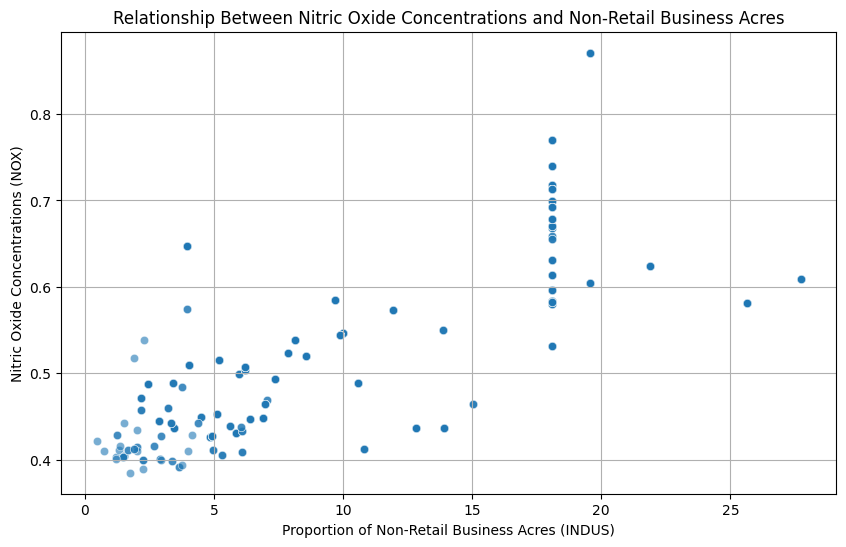

In [47]:
# Create a scatter plot for NOX vs. INDUS
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, alpha=0.6)  # Create the scatter plot

# Add title and labels
plt.title('Relationship Between Nitric Oxide Concentrations and Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')

# Show the plot
plt.grid(True)  # Add grid lines for better readability
plt.show()  # Display the plot

#Positief relationship (correlation)

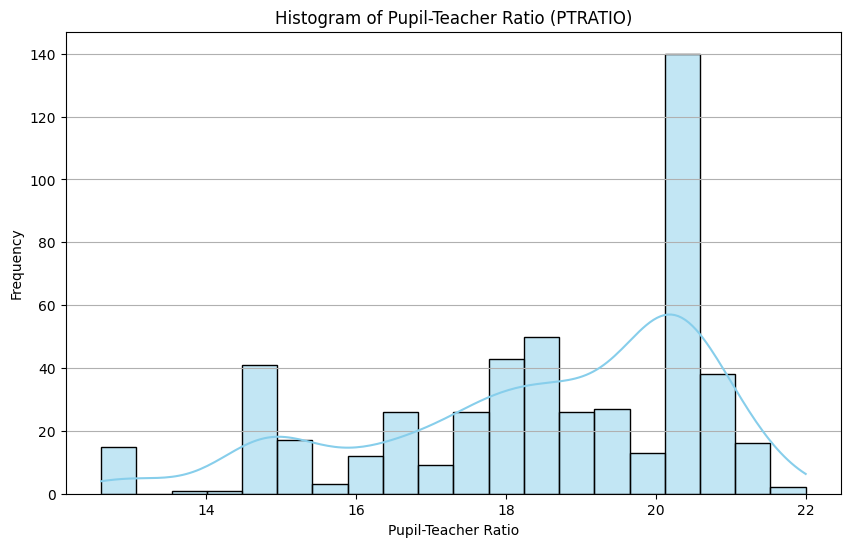

In [48]:
# Create a histogram for PTRATIO
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True, color='skyblue')  # Create the histogram

# Add title and labels
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True, axis='y')  # Add grid lines for better readability
plt.show()  # Display the plot

# Task 3: Use the appropriate tests to answer the questions provided.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [49]:
# Import necessary libraries
from scipy.stats import ttest_ind

# Separate the data into two groups based on CHAS
medv_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']  # Median values for houses bounded by the river
medv_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']  # Median values for houses not bounded by the river

# Perform an independent samples t-test
t_stat, p_value = ttest_ind(medv_chas_1, medv_chas_0, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in median home values between houses bounded by the Charles River and those not bounded.")
else:
    print("There is no significant difference in median home values between houses bounded by the Charles River and those not bounded.")


T-statistic: 3.113291312794837
P-value: 0.003567170098137517
There is a significant difference in median home values between houses bounded by the Charles River and those not bounded.


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [50]:
# Import necessary libraries
from scipy.stats import f_oneway

# Discretize the AGE variable into three groups
bins = [0, 35, 70, 100]  # Define the bin edges
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Separate MEDV values for each AGE_GROUP
group_1 = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
group_2 = boston_df[boston_df['AGE_GROUP'] == 'Between 35 and 70 years']['MEDV']
group_3 = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

# Perform ANOVA
f_stat, p_value = f_oneway(group_1, group_2, group_3)

# Print the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in median home values across the age groups.")
else:
    print("There is no significant difference in median home values across the age groups.")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
There is a significant difference in median home values across the age groups.


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [51]:
# Import necessary libraries
from scipy.stats import pearsonr

# Calculate Pearson correlation and p-value
corr, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres.")
else:
    print("There is no significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres.")


Pearson correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres.


### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [52]:
import statsmodels.api as sm

# Prepare the data for regression
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           1.21e-08
Time:                        18:56:57   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

# The OLS regression results for the impact of weighted distance to employment centers (DIS) on median home values (MEDV) provide several key insights. Here’s a breakdown of the results:

# Key Findings


---- Coefficient for DIS:

1.0916: For each additional unit of weighted distance to the five Boston employment centers, the median home value (MEDV) increases by $1,091.60 (since MEDV is in thousands of dollars).
This is a positive relationship: Homes farther from employment centers tend to have higher median values.

---- Statistical Significance:

P>|t| = 0.000: The p-value for the DIS coefficient is extremely small (less than 0.05), indicating that the relationship is statistically significant.
You can confidently conclude that DIS has a significant impact on MEDV.

# Model Fit:

R-squared = 0.062: Only 6.2% of the variability in MEDV is explained by DIS. This suggests that while DIS is a significant predictor, other factors also play a major role in determining home values.
Adj. R-squared = 0.061: Adjusts for the number of predictors and confirms the model’s explanatory power.

--- Confidence Interval for DIS:

[0.722, 1.462]: The 95% confidence interval for the DIS coefficient does not include zero, further confirming its significance.

# Model Diagnostics:

--- Prob (F-statistic) = 1.21e-08: The overall model is statistically significant.
Durbin-Watson = 0.570: Indicates positive autocorrelation in the residuals, suggesting potential issues with the model assumptions (e.g., omitted variables or serial correlation).
Prob(Omnibus) = 0.000 and Prob(JB) = 5.59e-67: The residuals are not normally distributed, which may affect inference.

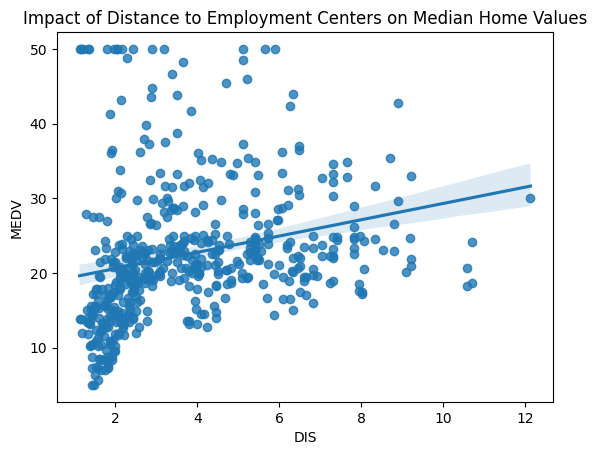

In [36]:
# Investigate multicollinearity or omitted variable bias if the Durbin-Watson statistic is a concern.
# Visualize the relationship with a scatter plot and regression line

sns.regplot(x='DIS', y='MEDV', data=boston_df)
plt.title('Impact of Distance to Employment Centers on Median Home Values')
plt.show()